<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#Style" data-toc-modified-id="Style-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Style</a></span></li><li><span><a href="#imports-and-data" data-toc-modified-id="imports-and-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>imports and data</a></span></li><li><span><a href="#Imports-for-reproducibility" data-toc-modified-id="Imports-for-reproducibility-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Imports for reproducibility</a></span></li><li><span><a href="#Custom-Imports" data-toc-modified-id="Custom-Imports-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Custom Imports</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Cronus" data-toc-modified-id="Cronus-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cronus</a></span></li><li><span><a href="#Hermes" data-toc-modified-id="Hermes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Hermes</a></span></li><li><span><a href="#Narcissus" data-toc-modified-id="Narcissus-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Narcissus</a></span></li></ul></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Predicting</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Cronus" data-toc-modified-id="Cronus-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cronus</a></span><ul class="toc-item"><li><span><a href="#Predict" data-toc-modified-id="Predict-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Predict</a></span></li><li><span><a href="#View-top" data-toc-modified-id="View-top-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>View top</a></span></li></ul></li><li><span><a href="#Hermes" data-toc-modified-id="Hermes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Hermes</a></span><ul class="toc-item"><li><span><a href="#Hermes-predict" data-toc-modified-id="Hermes-predict-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Hermes predict</a></span></li><li><span><a href="#View-top" data-toc-modified-id="View-top-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>View top</a></span></li></ul></li><li><span><a href="#Narcissus" data-toc-modified-id="Narcissus-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Narcissus</a></span><ul class="toc-item"><li><span><a href="#Predict" data-toc-modified-id="Predict-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Predict</a></span></li><li><span><a href="#View-top-prices" data-toc-modified-id="View-top-prices-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>View top prices</a></span></li></ul></li><li><span><a href="#Total-Prediction" data-toc-modified-id="Total-Prediction-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Total Prediction</a></span></li></ul></li></ul></div>

# Intro

## Style

In [1]:
USE_GPU = True
IGNORE_WARN = True
SEED = 42
import warnings
import matplotlib as mpl
mpl.rcParams['axes.titlesize']='xx-large'
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['axes.labelsize'] = 16

# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [2]:
if IGNORE_WARN:
    warnings.filterwarnings('ignore')

## imports and data

In [3]:
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from functools import partial
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Imports for reproducibility

In [4]:
import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

## Custom Imports

In [5]:
import importlib
import sys

if 'mlframe' in sys.modules:
    importlib.reload(sys.modules['mlframe'])
    importlib.reload(sys.modules['db'])

from db import DataBase
from mlframe import MLFrame
from models.create import NetworkCreator
from models.load import NetworkLoader

For convinent loading 'from mlframe import MLFrame


Using TensorFlow backend.


# Modeling

In [22]:
# RELOAD CUSTOM PACKAGE
import importlib
from models import create
from models import load
importlib.reload(create)
importlib.reload(load)
from models import create
from models import load
NetworkCreator = create.NetworkCreator
NetworkLoader = load.NetworkLoader

## Cronus

In [7]:
df_analyst = pd.read_pickle("./data/modeling/analyst.pkl")
df_prices = pd.read_pickle("./data/modeling/prices.pkl")
df_cronus = pd.concat([df_analyst, df_prices], axis=1)
X_cols = list(df_cronus.columns)
y_cols = list(df_prices.columns)
n_days = len(df_cronus)-1
name = 'Cronus'
cronus_loader = NetworkLoader(df_cronus, X_cols, y_cols, name, n_days)

y is in x


In [8]:
cronus_loader.top_10_hps[0].__dict__['values']

AttributeError: 'NetworkLoader' object has no attribute 'top_10_hps'

In [9]:
parameters = {'use_input_regularizer': 0,
             'input_neurons': 64,
             'input_dropout_rate': 0.1,
             'use_hidden_regularizer': 0,
             'hidden_dropout_rate': 0.0,
             'n_hidden_layers': 5,
             'hidden_neurons': 64,
             'patience': 100,
             'use_early_stopping': 0,
             'batch_size': 128,
             'input_regularizer_penalty': 0.05,
             'hidden_regularizer_penalty': 0.3
             }

In [10]:
cronus_model = cronus_loader.build_model(**parameters)
history = cronus_model.fit(
            cronus_loader.data_gen,
            epochs=30,
            callbacks=[])

Epoch 1/30
1/1 [==============================] - 0s 999us/step - loss: 0.6313
Epoch 2/30
1/1 [==============================] - 0s 2ms/step - loss: 0.6188
Epoch 3/30
1/1 [==============================] - 0s 1ms/step - loss: 0.6034
Epoch 4/30
1/1 [==============================] - 0s 1ms/step - loss: 0.5902
Epoch 5/30
1/1 [==============================] - 0s 999us/step - loss: 0.5708
Epoch 6/30
1/1 [==============================] - 0s 1ms/step - loss: 0.5493
Epoch 7/30
1/1 [==============================] - 0s 1000us/step - loss: 0.5218
Epoch 8/30
1/1 [==============================] - 0s 1ms/step - loss: 0.4863
Epoch 9/30
1/1 [==============================] - 0s 998us/step - loss: 0.4639
Epoch 10/30
1/1 [==============================] - 0s 998us/step - loss: 0.4143
Epoch 11/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3919
Epoch 12/30
1/1 [==============================] - 0s 1ms/step - loss: 0.3396
Epoch 13/30
1/1 [==============================] - 0s 1ms/step

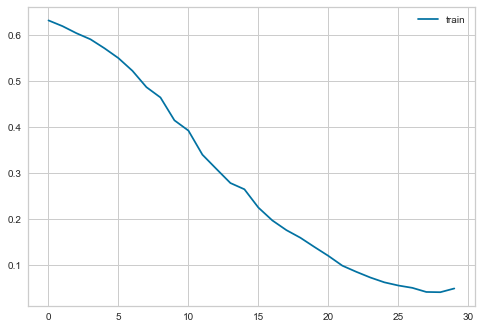

In [11]:
my_loss= history.history['loss']
plt.plot(range(len(my_loss)),my_loss, label='train')
plt.legend()

In [12]:
cronus_history = history

## Hermes

In [23]:
df_hermes = pd.read_pickle("./data/modeling/hermes.pkl")
df_analyst = pd.read_pickle("./data/modeling/analyst.pkl")
X_cols = [col for col in df_hermes.columns
          if col not in df_analyst.columns]
y_cols = [col for col in df_hermes.columns
          if col in df_analyst.columns]
n_days = len(df_hermes)-1
name = 'Hermes'
hermes_loader = NetworkLoader(df_hermes, X_cols, y_cols, name, n_days)

y is in dataframe but not x


In [24]:
try:
    print(hermes_loader.top_10_hps[0].__dict__['values'])
except IndexError:
    print("No training yet")

AttributeError: 'NetworkLoader' object has no attribute 'top_10_hps'

In [25]:
parameters = {'use_input_regularizer': 0,
              'input_neurons': 64,
              'input_dropout_rate': 0.3,
              'use_hidden_regularizer': 0,
              'hidden_dropout_rate': 0.0,
              'n_hidden_layers': 3,
              'hidden_neurons': 64,
              'patience': 50,
              'use_early_stopping': 0,
              'batch_size': 32,
              'hidden_regularizer_penalty': 0.1,
              'input_regularizer_penalty': 0.01
             }

In [26]:
hermes_model = hermes_loader.build_model(**parameters)
history = hermes_model.fit(
            hermes_loader.data_gen,
            epochs=30,
            callbacks=[])

Epoch 1/30
1/1 [==============================] - 0s 8ms/step - loss: 0.3476
Epoch 2/30
1/1 [==============================] - 0s 6ms/step - loss: 0.3434
Epoch 3/30
1/1 [==============================] - 0s 6ms/step - loss: 0.3306
Epoch 4/30
1/1 [==============================] - 0s 7ms/step - loss: 0.3206
Epoch 5/30
1/1 [==============================] - 0s 7ms/step - loss: 0.3096
Epoch 6/30
1/1 [==============================] - 0s 6ms/step - loss: 0.2878
Epoch 7/30
1/1 [==============================] - 0s 7ms/step - loss: 0.2645
Epoch 8/30
1/1 [==============================] - 0s 6ms/step - loss: 0.2696
Epoch 9/30
1/1 [==============================] - 0s 7ms/step - loss: 0.2400
Epoch 10/30
1/1 [==============================] - 0s 7ms/step - loss: 0.2111
Epoch 11/30
1/1 [==============================] - 0s 6ms/step - loss: 0.2058
Epoch 12/30
1/1 [==============================] - 0s 7ms/step - loss: 0.1650
Epoch 13/30
1/1 [==============================] - 0s 7ms/step - loss: 0.

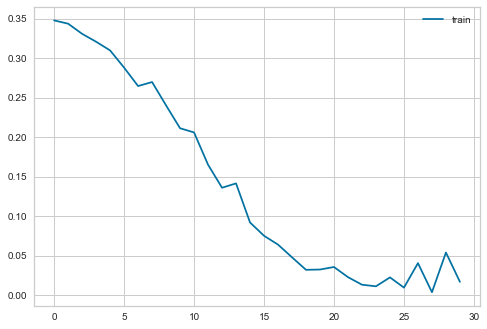

In [27]:
my_loss= history.history['loss']
plt.plot(range(len(my_loss)),my_loss, label='train')
plt.legend()

In [28]:
hermes_history = history

## Narcissus

In [35]:
df_performance = pd.read_pickle("./data/modeling/performance.pkl")
X_cols = list(df_performance.columns)
y_cols = X_cols
n_days = len(df_performance)-1
name = 'Narcissus'
narcissus_loader = NetworkLoader(df_performance, X_cols, y_cols, name, n_days)

y is the same as x


In [36]:
try:
    print(narcissus_loader.top_10_hps[0].__dict__['values'])
except Exception:
    print("No training yet")

No training yet


In [37]:
parameters = {'use_input_regularizer': 2,
              'input_neurons': 64,
              'input_dropout_rate': 0.1,
              'use_hidden_regularizer': 0,
              'hidden_dropout_rate': 0.0,
              'n_hidden_layers': 3,
              'hidden_neurons': 64,
              'patience': 100,
              'use_early_stopping': 0,
              'batch_size': 128,
              'input_regularizer_penalty': 0.01,
              'hidden_regularizer_penalty': 0.05
             }

In [38]:
narcissus_model = narcissus_loader.build_model(**parameters)
history = narcissus_model.fit(
            narcissus_loader.data_gen,
            epochs=30,
            callbacks=[])

Epoch 1/30
1/1 [==============================] - 0s 996us/step - loss: 5.3940
Epoch 2/30
1/1 [==============================] - 0s 1ms/step - loss: 4.8835
Epoch 3/30
1/1 [==============================] - 0s 1ms/step - loss: 4.4022
Epoch 4/30
1/1 [==============================] - 0s 1ms/step - loss: 3.9536
Epoch 5/30
1/1 [==============================] - 0s 997us/step - loss: 3.5293
Epoch 6/30
1/1 [==============================] - 0s 2ms/step - loss: 3.1365
Epoch 7/30
1/1 [==============================] - 0s 2ms/step - loss: 2.7653
Epoch 8/30
1/1 [==============================] - 0s 1ms/step - loss: 2.4343
Epoch 9/30
1/1 [==============================] - 0s 2ms/step - loss: 2.1089
Epoch 10/30
1/1 [==============================] - 0s 999us/step - loss: 1.8192
Epoch 11/30
1/1 [==============================] - 0s 999us/step - loss: 1.5783
Epoch 12/30
1/1 [==============================] - 0s 1ms/step - loss: 1.3451
Epoch 13/30
1/1 [==============================] - 0s 1ms/step - 

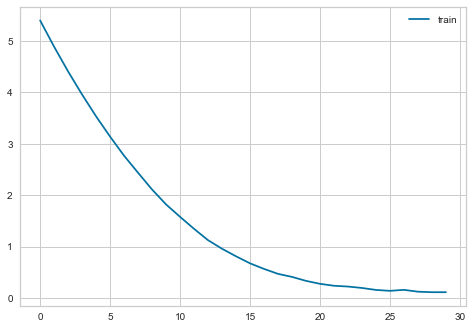

In [39]:
my_loss= history.history['loss']
plt.plot(range(len(my_loss)),my_loss, label='train')
plt.legend()

In [40]:
narcissus_history = history

# Predicting

In [25]:
cronus_model, hermes_model, narcissus_model

(<tensorflow.python.keras.engine.sequential.Sequential at 0x19ac9f939c8>,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x19d228d9e08>)

## Functions

In [105]:
def predict_next_day(model, loader, same=False):
    out_columns = loader.y_cols
    prediction = model.predict(loader.data_gen)
    if same:
        prediction = loader.X_scaler.inverse_transform(prediction)
    else:
        prediction = loader.y_scaler.inverse_transform(prediction)
    return pd.DataFrame(prediction, columns=out_columns).iloc[[0]]

In [13]:
# For predicting with n_input = 3
# pd.DataFrame(df_cronus.iloc[-3:].values, columns=df_cronus.columns)['AAPL_price']
# cronus_last_3_x = df_cronus.iloc[-3:].values.reshape(3, 1, cronus_loader.X_n_features)

0   122.720
1   123.080
2   122.940
Name: AAPL_price, dtype: float64

## Cronus

### Predict

In [52]:
df_cronus_prediction = predict_next_day(cronus_model, cronus_loader)
df_cronus_prediction.head()

,A_price,AAL_price,AAP_price,AAPL_price,ABBV_price,ABC_price,ABMD_price,ABT_price,ACN_price,ADBE_price,...,XEL_price,XLNX_price,XRAY_price,XRX_price,XYL_price,YUM_price,ZBH_price,ZBRA_price,ZION_price,ZTS_price
0,113.065,17.149,149.624,116.892,118.141,107.262,261.113,101.617,237.196,482.882,...,67.560,153.692,60.400,20.882,93.220,112.039,156.104,401.961,43.650,169.353


### View top

In [73]:
last_price = df_prices.iloc[[-1]]
test_df = pd.concat([last_price, df_cronus_prediction])
test_df.index = [0, 1]
test_df = pd.concat([test_df, test_df.diff().dropna()])
test_df.index = ['before', 'after', 'difference']
test_df = test_df.transpose()
test_df['perc'] = (test_df['difference'] / test_df['before'])*100
cronus_pred_diff = test_df.sort_values(by='perc', ascending=False)
cronus_pred_diff.head(10)

,before,after,difference,perc
MKC_price,93.440,112.164,18.724,20.039
NVDA_price,534.000,631.846,97.846,18.323
DAL_price,42.410,49.033,6.623,15.616
WFC_price,28.940,33.021,4.081,14.100
LH_price,202.100,230.340,28.240,13.973
GE_price,10.960,12.421,1.461,13.330
EOG_price,52.150,58.150,6.000,11.505
EXPE_price,126.240,140.604,14.364,11.378
XRAY_price,54.280,60.400,6.120,11.274
AMD_price,92.930,103.262,10.332,11.118


## Hermes

### Hermes predict

In [97]:
cols_to_round = ['Argus', 'TradingCentral', 'Jefferson', 'McLeanCapital',
                 'NedDavis', 'Zacks', 'ThomsonReutersVerus']
cols_to_round = [col for col in df_analyst.columns
                 if col.split('_')[1] in cols_to_round]
len(cols_to_round)

2709

In [100]:
df_hermes_prediction = predict_next_day(hermes_model, hermes_loader)
df_hermes_prediction[cols_to_round] = df_hermes_prediction[cols_to_round].round()
df_hermes_prediction

,A_Argus,A_StarMine,A_ColumbineCapital,A_FordEquityResearch,A_ISSEVA,A_Jefferson,A_McLeanCapital,A_NedDavis,A_TradingCentral,A_Zacks,...,ZTS_McLeanCapital,ZTS_NedDavis,ZTS_TradingCentral,ZTS_Zacks,ZTS_SPValuation,ZTS_SPQuality,ZTS_SPGrowthStability,ZTS_SPFinancialHealth,ZTS_ThomsonReutersVerus,ZTS_ThomsonReutersIBES
0,-0.000,8.385,1.002,3.137,70.406,1.000,3.000,3.000,1.000,3.000,...,3.000,3.000,3.000,3.000,86.935,86.535,62.543,79.014,3.000,2.058


### View top

In [103]:
last_analyst = df_analyst.iloc[[-1]]
test_df = pd.concat([last_analyst, df_hermes_prediction])
test_df.index = [0, 1]
test_df = pd.concat([test_df, test_df.diff().dropna()])
test_df.index = ['before', 'after', 'difference']
test_df = test_df.transpose()
test_df['perc'] = (test_df['difference'] / test_df['before'])*100
hermes_pred_diff = test_df.sort_values(by='perc', ascending=False)
hermes_pred_diff.loc[~hermes_pred_diff['perc'].isin([np.NaN, np.inf, -np.inf])].head(10)

,before,after,difference,perc
JWN_ISSEVA,2.000,4.431,2.431,121.546
KMB_SPGrowthStability,2.000,4.072,2.072,103.622
UNP_SPGrowthStability,1.000,1.615,0.615,61.534
LVS_SPGrowthStability,1.000,1.571,0.571,57.088
MDT_SPGrowthStability,4.000,5.910,1.910,47.758
UNH_SPGrowthStability,3.000,4.422,1.422,47.406
LVS_StarMine,0.300,0.424,0.124,41.242
ECL_SPGrowthStability,4.000,5.586,1.586,39.660
UAL_StarMine,0.400,0.557,0.157,39.174
HP_StarMine,0.400,0.542,0.142,35.501


## Narcissus

### Predict

In [107]:
df_narcissus_prediction = predict_next_day(narcissus_model, narcissus_loader, same=True)
df_narcissus_prediction

,A_RevenueTTM,A_TotalCash,A_ExDividendDate,A_Dividend,A_DividendYield,A_PriceToBook,A_PriceToSales,A_EnterpriseValue,A_PriceToCashFlow,A_PE,...,ZTS_PE,ZTS_ReturnonEquity,ZTS_FreeCashFlow,ZTS_TotalDebtToEquity,ZTS_PricePerformance52Weeks,ZTS_PricePerformanceYTD,ZTS_TotalReturn1Yr,ZTS_TotalReturn3Yr,ZTS_VolumeAvg90Day,ZTS_price
0,5353.204,1444.873,20115.744,0.198,0.665,7.627,7.138,38722150400.000,37.619,56.325,...,48.472,55.151,1556.517,241.547,23.765,19.529,28.383,31.389,1.764,173.219


### View top prices

In [117]:
df_narcissus_prediction_prices = \
    df_narcissus_prediction[[col for col in df_narcissus_prediction.columns
                            if col.split('_')[1] == 'price']]
df_narcissus_prediction_prices.head()

,A_price,AAL_price,AAP_price,AAPL_price,ABBV_price,ABC_price,ABMD_price,ABT_price,ACN_price,ADBE_price,...,XEL_price,XLNX_price,XRAY_price,XRX_price,XYL_price,YUM_price,ZBH_price,ZBRA_price,ZION_price,ZTS_price
0,126.194,16.306,170.243,121.413,114.600,105.057,279.480,115.183,265.488,520.940,...,67.827,159.902,52.811,21.708,105.788,113.720,149.623,388.828,45.021,173.219


In [118]:
last_price = df_prices.iloc[[-1]]
test_df = pd.concat([last_price, df_narcissus_prediction_prices])
test_df.index = [0, 1]
test_df = pd.concat([test_df, test_df.diff().dropna()])
test_df.index = ['before', 'after', 'difference']
test_df = test_df.transpose()
test_df['perc'] = (test_df['difference'] / test_df['before'])*100
narcissus_pred_diff = test_df.sort_values(by='perc', ascending=False)
narcissus_pred_diff.head(10)

,before,after,difference,perc
DRI_price,111.650,127.182,15.532,13.911
WHR_price,185.150,209.417,24.267,13.107
ALGN_price,515.760,583.082,67.322,13.053
MOS_price,22.380,25.247,2.867,12.812
HOLX_price,72.770,81.817,9.047,12.433
WMB_price,22.100,24.819,2.719,12.301
MHK_price,132.770,148.706,15.936,12.003
MET_price,47.520,53.121,5.601,11.786
LB_price,40.960,45.738,4.778,11.664
EXPE_price,126.240,140.881,14.641,11.598


## Total Prediction

In [207]:
pred_diff = narcissus_pred_diff.reset_index().merge(cronus_pred_diff.reset_index(),
                                                    on=['index', 'before'],
                                                    suffixes=('_n', '_c'))
pred_diff['sym'] = pred_diff['index']
pred_diff.drop('index', inplace=True, axis=1)
pred_diff = pred_diff.set_index('sym', drop=True)
pred_diff['difference_mean'] = pred_diff[['difference_c', 'difference_n']].transpose().mean()
pred_diff['perc_mean'] = pred_diff[['perc_c', 'perc_n']].transpose().mean()
pred_diff['both_pos'] = pd.concat([pred_diff['perc_n'] > 0, pred_diff['perc_c'] > 0], axis=1).transpose().all()
pred_diff = pred_diff.sort_values(by=['perc_mean'], ascending=False)
pred_diff = pred_diff.round(2)
pred_diff.head()

,before,after_n,difference_n,perc_n,after_c,difference_c,perc_c,difference_mean,perc_mean,both_pos
sym,,,,,,,,,,
NVDA_price,534.000,579.100,45.100,8.450,631.850,97.850,18.320,71.470,13.380,True
EXPE_price,126.240,140.880,14.640,11.600,140.600,14.360,11.380,14.500,11.490,True
HOLX_price,72.770,81.820,9.050,12.430,79.900,7.130,9.800,8.090,11.120,True
MKC_price,93.440,94.580,1.140,1.220,112.160,18.720,20.040,9.930,10.630,True
DE_price,252.600,277.960,25.360,10.040,279.350,26.750,10.590,26.050,10.310,True


In [208]:
top_predictions = pred_diff.loc[pred_diff['both_pos']].sort_values(
                    by=['perc_mean'], ascending=False).head(20)
pretty_predictions = {}
for idx, row in top_predictions.iterrows():
    sym = idx.split('_')[0]
    pred_up = round(row['perc_mean'], 2)
    pretty_predictions[sym] = f"+ %{pred_up}"
pd.DataFrame(pd.Series(pretty_predictions))

,0
NVDA,+ %13.38
EXPE,+ %11.49
HOLX,+ %11.12
MKC,+ %10.63
DE,+ %10.31
SWKS,+ %9.55
ALGN,+ %9.28
MOS,+ %9.24
LB,+ %8.96
EOG,+ %8.87


In [209]:
today = time.strftime("%m-%d-%Y")
pred_diff.to_pickle("./predictions/pred-%s.pkl" % today)
pred_diff.to_csv("./predictions/pred-%s.csv" % today)

In [212]:
pred_diff['both_pos'].value_counts(normalize=True)

False   0.576
True    0.424
Name: both_pos, dtype: float64